# ODEV : Basit OCR Tanimlama

In [1]:
from matplotlib.pyplot import imread as imread
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convert_RGB_to_BW(img, threshold = 100):
    res = np.zeros((img.shape[0], img.shape[1]))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            # 3 bileşenlerin ortalaması belirlenen threshold üstünde ise 1 olarak kabul edeceğiz
            if(sum(img[i,j,:])/3 > threshold):
                res[i,j] = 1
            # değil ise 0 olarak kabul edeceğiz
            else:
                res[i,j] = 0
    return res

In [3]:
letters = ['a', 'b', 'c', 'd', 'e']
images = {}
for l in letters:
    images[l] = []  #l harfi icin bos bir liste haziriliyoruz, birazdan sonra icinde 5 tane eleman olacak
    for i in range(1,6): # 1 .. 5
        # ../letters/a1.jpg
        img = convert_RGB_to_BW(imread('../letters/'+l+str(i)+'.jpg'))
        images[l].append(img)

## Harflardan ortak noktalar bulma

her bir harf için el ile çizilmiş 5 tane fotoğraf oluşturdum, aşağıdaki gibi

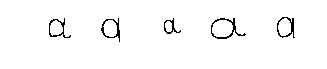

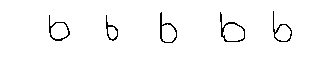

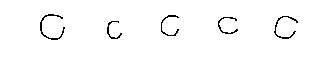

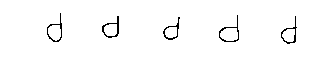

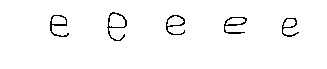

In [4]:
for l in letters:
    for (i,img) in enumerate(images[l]):
        plt.axis('off')
        plt.subplot(1,6,i+1), plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [5]:
def findCenter(points):
    x = 0
    y = 0
    for p in points:
        x += p[0]
        y += p[1]
    return [x/len(points), y/len(points)]

## getBlackPoints fonksiyonu
Bu fonksiyon sadece fotoğraftaki siyah noktaların coordination'ları döndürüyor

In [6]:
def getBlackPoints(img):
    return {(i,j)   for i in range(img.shape[0])
            for j in range(img.shape[1]) 
            if img[i,j] == 1
    }

## myOCR fonksiyonu
bu fonksiyon daha önce bulunan `reference` değerleri ve okuması istenilen fotoğrafı alarak, en yakın cevabı olan harfı döndürüyor

In [7]:
def myOCR(bt_img, reference):
    res = {'letter':None, 'diff':[1000, 1000]}
    found_center = findCenter(getBlackPoints(bt_img))
    for l in reference:
        diff_x = abs(found_center[0] - reference[l][0])
        diff_y = abs(found_center[1] - reference[l][1])
        if (diff_x + diff_y) < (sum(res['diff'])) :
            res['letter'] = l
            res['diff'] = [diff_x, diff_y]
    return res

## ``reference`` değerleri hesaplamak
Her harf için her 5 fotoğrafları için ortak ortak noktayı bularak, bu noktaların ortağı `reference` sözlüğa saklanıacağız.

Elde aldığımız değerler daha sonra `myOCR` fonksiyonu ile kullanacağız

In [8]:
reference = {}
for l in letters:
    center = None
    for img in images[l]:
        black_points = getBlackPoints(img)
        curr_center = findCenter(black_points)
        if center:
            center = findCenter([center,curr_center])
        else:
            center = curr_center
    reference[l] = center

# Sonuç

Aşağıda (test1, test2... test5) 5 tane farklı fotoğrafların `myOCR` ile çağırıldığında verilen sonuç

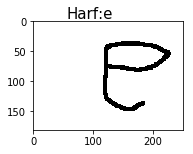

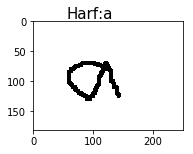

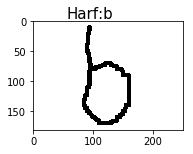

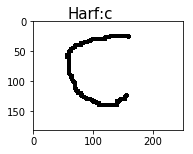

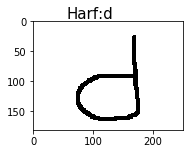

In [9]:
for i in range(1, 6):
    bt_img = convert_RGB_to_BW(imread('../letters/test{}.jpg'.format(i)))
    res = myOCR(bt_img, reference)
    plt.figure(figsize = (20,2)).suptitle('Harf:'+res['letter'], fontsize=15)
    plt.imshow(bt_img, cmap='gray', interpolation='nearest')
plt.show()